<H1>Bank Fraud Detection by Deep Neural Network using Keras</H1>

<p>We will use deep nerual network to detect fraud detch in payment. The dataset can be acess using the following link
<a href="https://www.kaggle.com/datasets/volodymyrgavrysh/fraud-detection-bank-dataset-20k-records-binary">Link</a></p>
<p>The dataset have 112 features, with 111 indepedent variable and one target variable</p>
<p>Lets import the dataset and import the librarys </p>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import mstats
data = pd.read_csv(r"D:\ML dataset\Unzipped file\Fraud detection bank dataset 20K records binary\fraud_detection_bank_dataset.csv")
data = data.drop(["Unnamed: 0"],axis=1)
data.head()

col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  ...  \
0      9   1354      0     18      0      1      7      9      0      0  ...   
1      0    239      0      1      0      1      0      0      0      0  ...   
2      0    260      0      4      0      3      6      0      0      0  ...   
3     17    682      0      1      0      0      8     17      0      0  ...   
4      1    540      0      2      0      1      7      1      0      0  ...   

   col_103  col_104  col_105  col_106  col_107  col_108  col_109  col_110  \
0        0        0        0        1        1        0        0        0   
1        0        1        0        0        0        0        0        0   
2        0        0        0        1        1        0        0        0   
3        0        1        0        1        1        0        0        0   
4        0        0        0        1        1        0        0        0   

   col_111  targets  
0       49        1  
1       55        1  
2       56        1  
3       65        1  
4      175        1  

[5 rows x 113 columns]

In [2]:
print(data.isnull().any().any())
print(data.isna().any().any())

False
False


<p>We donot have any null or ana values</p>

In [3]:
# lets find if there are any binay features
for i in data.columns:
    if len(data[i].unique())==2:
        print(i,data[i].unique())

col_13 [0 1]
col_14 [1 0]
col_15 [0 1]
col_16 [1 0]
col_28 [1 0]
col_58 [  0 102]
col_72 [0 1]
col_73 [0 1]
col_74 [0 1]
col_75 [0 1]
col_76 [0 1]
col_77 [0 1]
col_78 [0 1]
col_79 [0 1]
col_80 [0 1]
col_81 [0 1]
col_82 [0 1]
col_83 [0 1]
col_84 [0 1]
col_85 [0 1]
col_86 [0 1]
col_87 [0 1]
col_88 [0 1]
col_89 [0 1]
col_90 [0 1]
col_91 [0 1]
col_92 [0 1]
col_93 [0 1]
col_94 [0 1]
col_95 [0 1]
col_96 [1 0]
col_97 [1 0]
col_98 [1 0]
col_99 [0 1]
col_100 [0 1]
col_101 [0 1]
col_104 [0 1]
col_105 [0 1]
col_106 [1 0]
col_107 [1 0]
col_108 [0 1]
col_109 [0 1]
targets [1 0]


<p>The above columns are binary in nature</p>

In [4]:
# lets find if there are any continous features
for i in data.columns:
    if ((len(data[i].unique())/len(data[i]))>=0.01) |(len(data[i].unique())>=5):
        print(i,len(data[i].unique()))

col_0 142
col_1 1920
col_2 53
col_3 115
col_4 22
col_5 61
col_6 11
col_7 142
col_17 617
col_22 167
col_23 552
col_24 132
col_25 152
col_26 77
col_27 11
col_29 39
col_30 211
col_31 33
col_32 75
col_33 8
col_34 166
col_36 346
col_37 152
col_38 1575
col_39 6
col_40 9
col_41 62
col_42 240
col_43 46
col_44 78
col_45 23
col_46 19
col_47 441
col_48 157
col_49 503
col_50 357
col_54 1686
col_55 252
col_56 68
col_57 309
col_59 40
col_60 219
col_61 38
col_62 65
col_63 393
col_64 120
col_65 369
col_66 231
col_67 9743
col_68 543
col_69 26
col_102 9
col_110 13
col_111 381


<p>The above columns have more then 10 unique values or are continous in distribution</p>

In [5]:
# lets find if there are any normally distribution features
for i in data.columns:
    z,pval = mstats.normaltest(data[i])
    if pval > 0.055:
        print(i,len(data[i].unique()))

<p>There are no column with normal distribution</p>

In [6]:
data["targets"].value_counts()

targets
0    15030
1     5438
Name: count, dtype: int64

<p>We donot have balance distribution of class</p>

In [7]:
data["targets"].value_counts(normalize=True)

targets
0    0.734317
1    0.265683
Name: proportion, dtype: float64

<p> Lets plot the correaltion heatmap to see which variable are correlated with the target variable</p>

<Axes: >

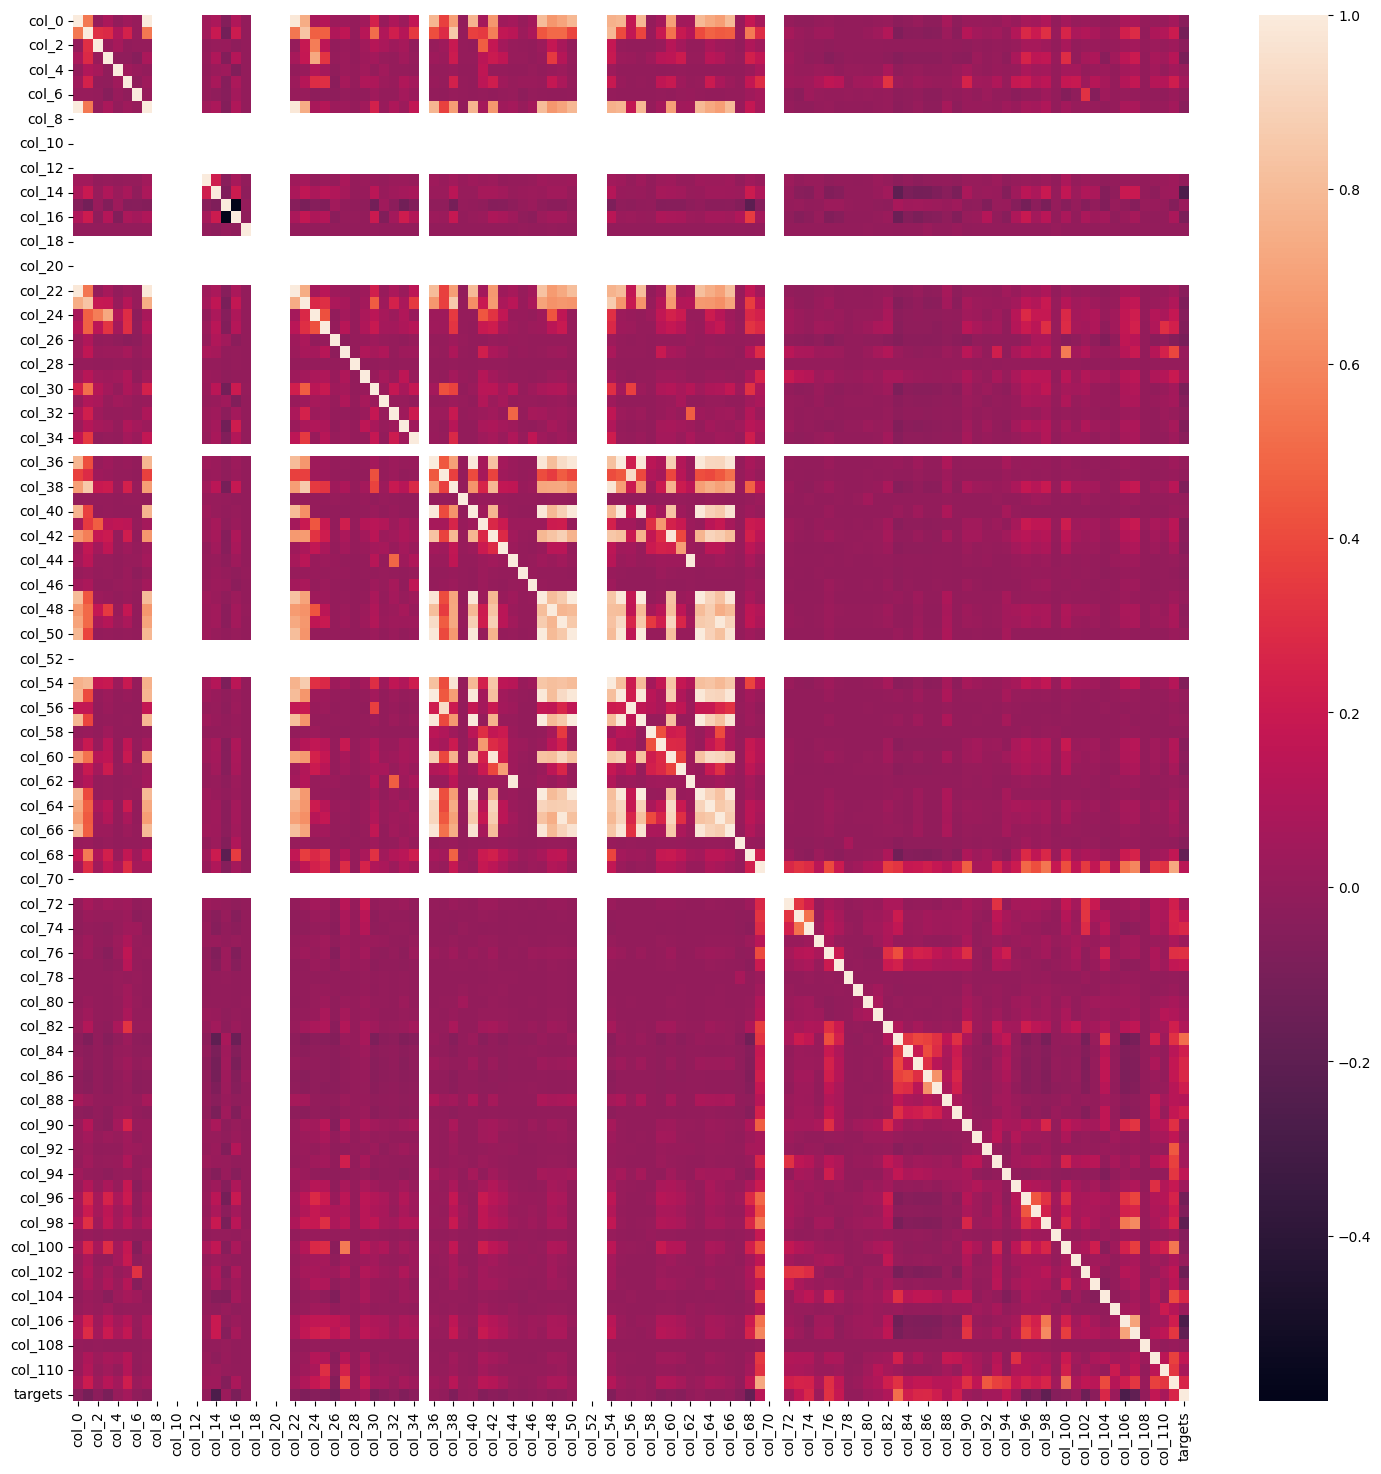

In [8]:
plt.figure(figsize= (18,18,))
sns.heatmap(data.corr())

In [9]:
data.corr()['targets'].sort_values(ascending=False)[0:10]

targets    1.000000
col_83     0.519494
col_76     0.311553
col_86     0.276921
col_74     0.273117
col_104    0.273051
col_85     0.270597
col_111    0.262442
col_89     0.227494
col_84     0.227416
Name: targets, dtype: float64

<p>We can see which variable have the highest correaltion with target variable</p>

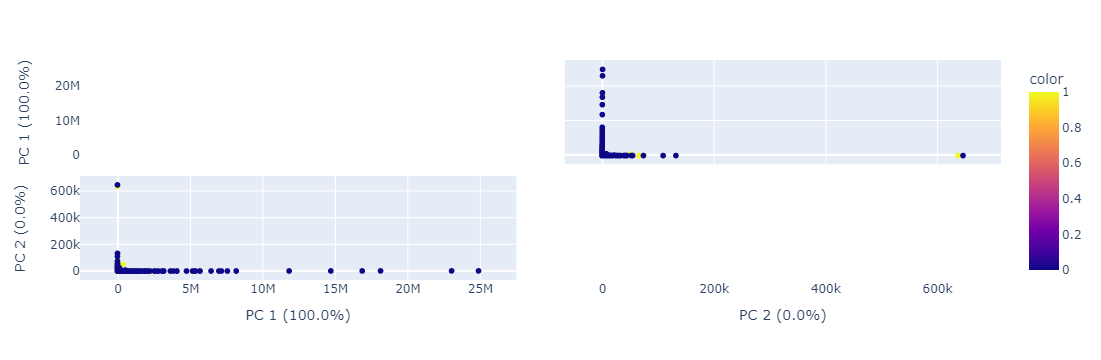

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(data.drop(["targets"],axis=1))
import plotly.express as px
labels = {str(i): f"PC {i+1} ({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)}
fig = px.scatter_matrix(components,labels=labels,dimensions=range(2),color=data["targets"])
fig.update_traces(diagonal_visible=False)
fig.show()

<p>Let's split the data in training, validation and testing variable. </p>

In [11]:
X = data.drop(["targets"],axis=1)
Y = data["targets"]
X_train,X_,Y_train,Y_ = train_test_split(X,Y,test_size=0.2,shuffle=True)
X_test,X_val,Y_test,Y_val = train_test_split(X_,Y_,test_size=0.5,shuffle=True)
print(f"Training data shape {X_train.shape[0]}")
print(f"Testing data shape {X_test.shape[0]}")
print(f"Validation data shape {X_val.shape[0]}")

Training data shape 16374
Testing data shape 2047
Validation data shape 2047


In [12]:
Y_train.value_counts()

targets
0    12019
1     4355
Name: count, dtype: int64

In [13]:
Y_test.value_counts()

targets
0    1497
1     550
Name: count, dtype: int64

In [14]:
Y_val.value_counts()

targets
0    1514
1     533
Name: count, dtype: int64

<p>Lets check if we are using GPU.</p>
<p>Lets use keras to make a model</p>

In [15]:
import torch
from torch import nn
from torch.utils.data import DataLoader
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")
import keras
from keras import backend as K
print(K.backend())

Using cuda device
torch


In [16]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(128, input_shape=(112,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

D:\Python_venv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          14,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,345 (99.00 KB)

 Trainable params: 25,345 (99.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7804 - loss: 1.2697 - val_accuracy: 0.8554 - val_loss: 0.8756
Epoch 2/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8398 - loss: 0.9428 - val_accuracy: 0.8691 - val_loss: 0.8827
Epoch 3/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8611 - loss: 0.8183 - val_accuracy: 0.8950 - val_loss: 0.6935
Epoch 4/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8870 - loss: 0.6362 - val_accuracy: 0.9038 - val_loss: 0.3954
Epoch 5/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8886 - loss: 0.3949 - val_accuracy: 0.9062 - val_loss: 0.3226
Epoch 6/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8931 - loss: 0.3388 - val_accuracy: 0.9082 - val_loss: 0.2978
Epoch 7/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8923 - loss: 0.3220 - val_accuracy: 0.9028 - val_loss: 0.3101
Epoch 8/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8927 - loss: 0.3060 - 

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9090 - loss: 0.3186
Test Loss: 0.2999362647533417
Test Accuracy: 0.9101123809814453


<p>We have a model have above 90% accuracy</p>

Text(0.5, 1.0, 'Training and Validation Accuracy')

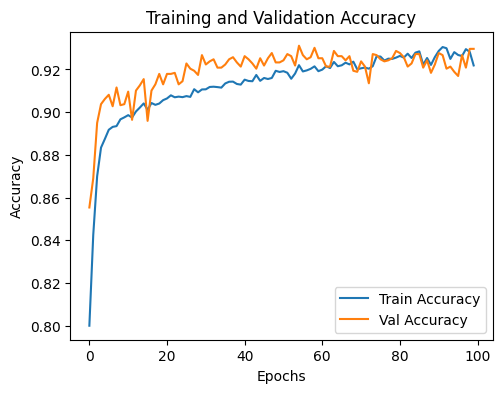

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

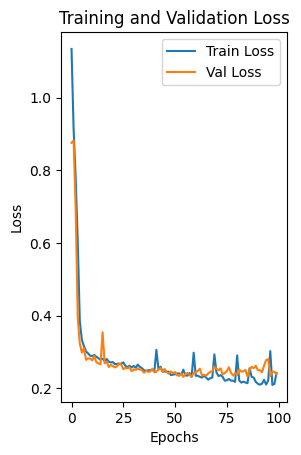

In [20]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[1427   70]
 [ 126  424]]


Text(0.5, 1.0, 'Confusion Matrix')

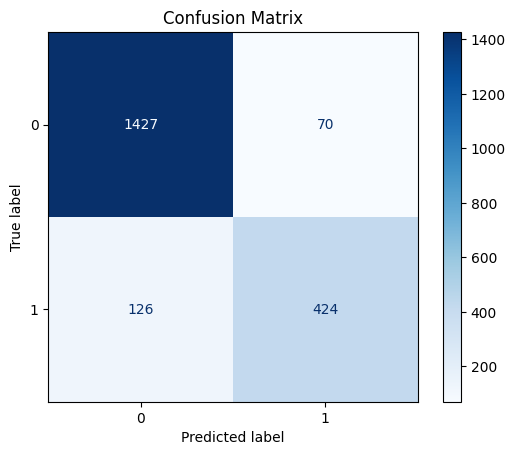

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Make predictions on the test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.3).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")

<p>As we can see, our model is able to predict more than 75% of fruads as fruads.</p>

In [22]:
from sklearn.metrics import  precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
# Compute additional metrics
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_probs)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Precision: 0.8582995951417004
Recall: 0.7709090909090909
F1 Score: 0.8122605363984674
ROC AUC: 0.9165858990708691


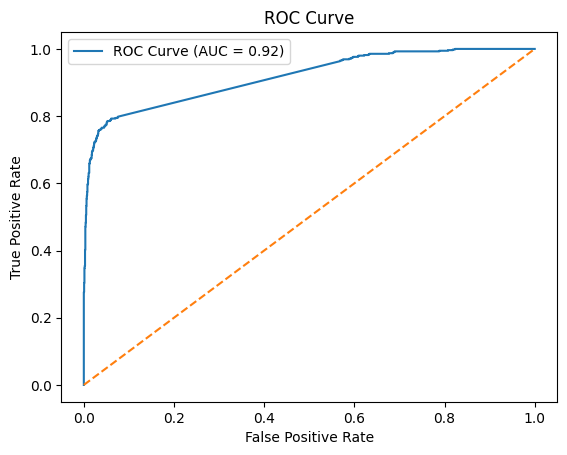

In [23]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_probs)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

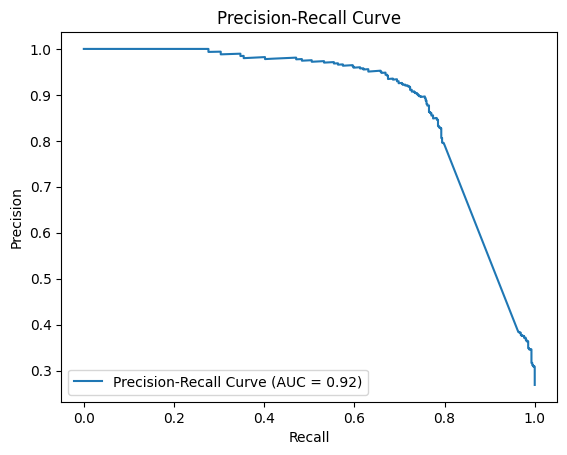

In [24]:
# Plot Precision-Recall Curve
precisions, recalls, _ = precision_recall_curve(Y_test, y_pred_probs)
plt.plot(recalls, precisions, label=f"Precision-Recall Curve (AUC = {roc_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()